# Exercise 6.6

**Steps 1-2:**

In [10]:
#1. Install the Quandl library and register for a Quandl account.
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 

import os
import warnings

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [2]:
#2. Find a data set to work and import it into your Jupyter notebook.
quandl.ApiConfig.api_key = 'iqzfar_zCMLXY5otzLs5'

In [6]:
data = quandl.get('FRED/GDPPOT')

In [7]:
data.head()

,Value
Date,
1949-01-01,2102.982630
1949-04-01,2130.581305
1949-07-01,2159.340530
1949-10-01,2186.844859
1950-01-01,2216.058359


In [9]:
data.shape

(332, 1)

**Steps 3-7:**

In [ ]:
#3. Make a subset of your data set if necessary

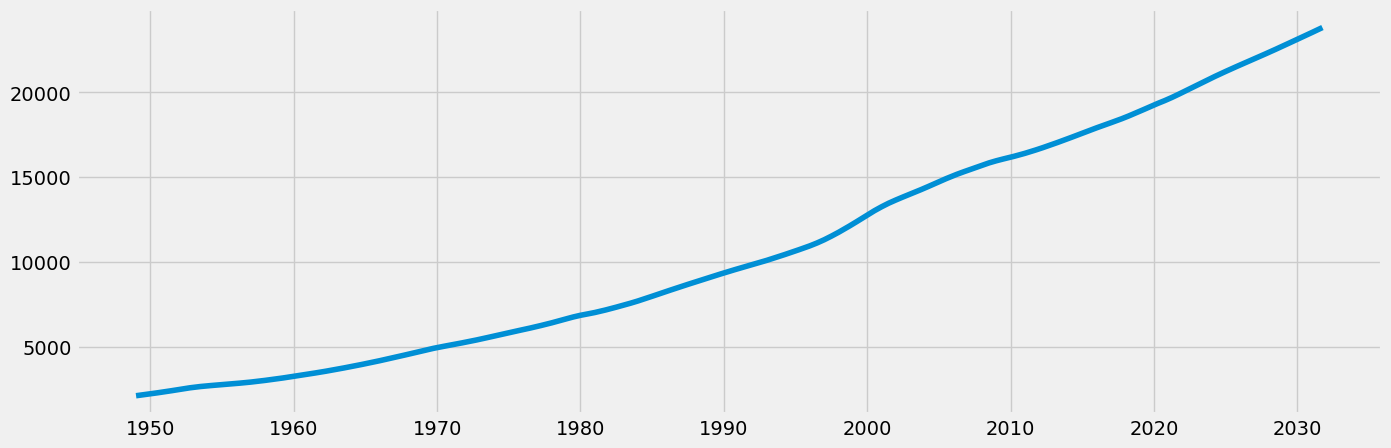

In [11]:
#4. Create a line chart of your data.
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data)

In [13]:
#5. Decompose the data’s components.
decomposition = sm.tsa.seasonal_decompose(data, model='additive')

In [14]:
from pylab import rcParams 

rcParams['figure.figsize'] = 18, 7

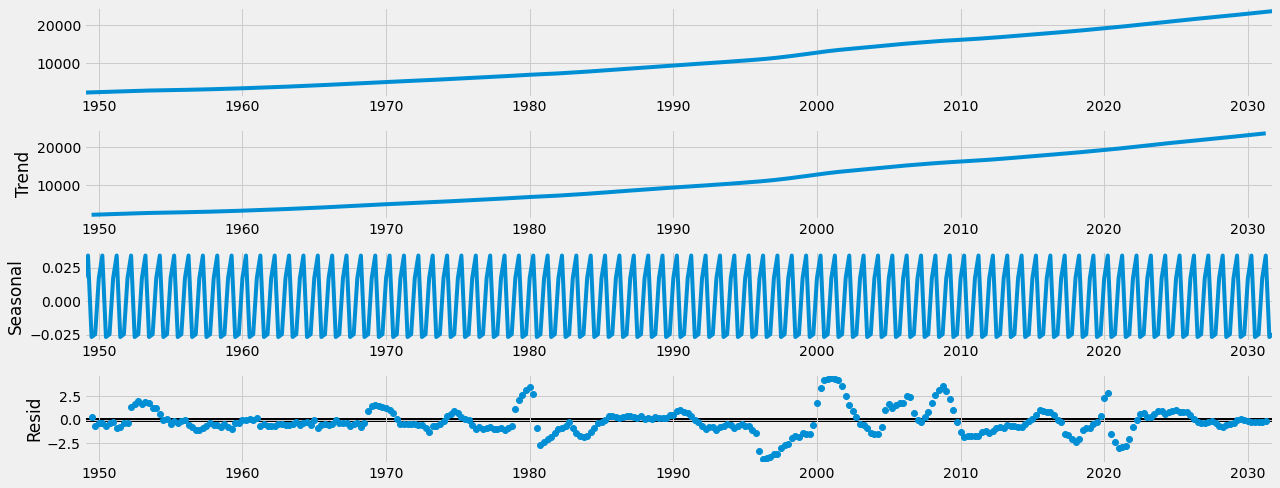

In [15]:
decomposition.plot()
plt.show()

In [16]:
#6. Conduct a Dickey-Fuller test to check for stationarity.

from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries): 
    #Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)
    
dickey_fuller(data['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                   2.022994
p-value                          0.998702
Number of Lags Used              5.000000
Number of Observations Used    326.000000
Critical Value (1%)             -3.450569
Critical Value (5%)             -2.870447
Critical Value (10%)            -2.571515
dtype: float64


The results of the Dickey-Fuller test indicate that

In [ ]:
#7. If your data isn’t stationary, conduct a round of differencing on it and repeat step 6.

In [17]:
data_diff = data - data.shift(1)

In [18]:
data_diff.dropna(inplace = True)

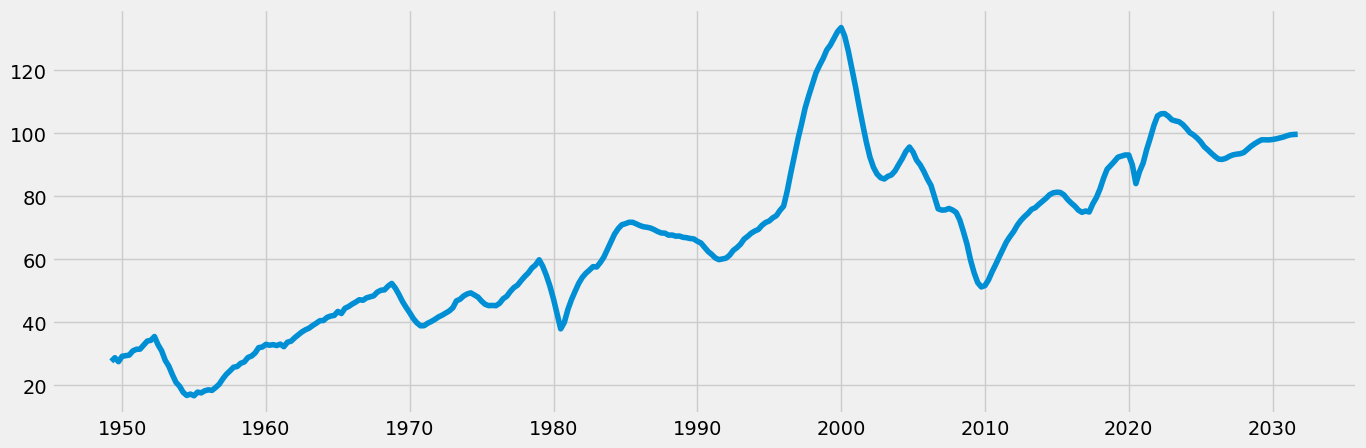

In [19]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [20]:
from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries): 
    #Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)
    
dickey_fuller(data_diff['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                  -1.620261
p-value                          0.472593
Number of Lags Used              4.000000
Number of Observations Used    326.000000
Critical Value (1%)             -3.450569
Critical Value (5%)             -2.870447
Critical Value (10%)            -2.571515
dtype: float64
